# Regression

Part of Machine Learning with Python course provided by IBM through Cognitive Class.

**Objectives**   
After completing this notebook, we will be able to:
- Use scikit-learn to implement simple LinearRegression
- Use scikit-learn to implement multiple LinearRegression
- Use scikit-learn to implement Polynomial Regression
- Differentiate between linear and non-linear regression
- Create a model, train it, test it, and use the model

## Table of Contents

> 1. [Understanding the Data](#Understanding-the-Data)
> 2. [Data Exploration](#Data-Exploration)
> 3. [Simple Regression Model](#Simple-Regression-Model)
> 4. [Multiple Regression Model](#Multiple-Regression-Model)
> 5. [Polynomial Regression Model](#Polynomial-Regression-Model)
> 6. [Non-Linear Regression Analysis](#Non-Linear-Regression-Analysis)

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# Download the data (uncomment the line below to download)
#!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 21 72629   21 15430    0     0   5910      0  0:00:12  0:00:02  0:00:10  5911
100 72629  100 72629    0     0  23053      0  0:00:03  0:00:03 --:--:-- 23064


## Understanding the Data

We have downloaded a fuel consumption dataset, `FuelConsumptionCo2.csv`, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.   
[Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)   
- MODELYEAR e.g. 2014
- MAKE e.g. Acura
- MODEL e.g. ILX
- VEHICLE CLASS e.g. SUV
- ENGINE SIZE e.g. 4.7
- CYLINDERS e.g 6
- TRANSMISSION e.g. A6
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
- FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
- CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

In [3]:
# read the data
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

Let's first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# let's select some features to explore more
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',
           'CO2EMISSIONS']
cdf = df[features]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


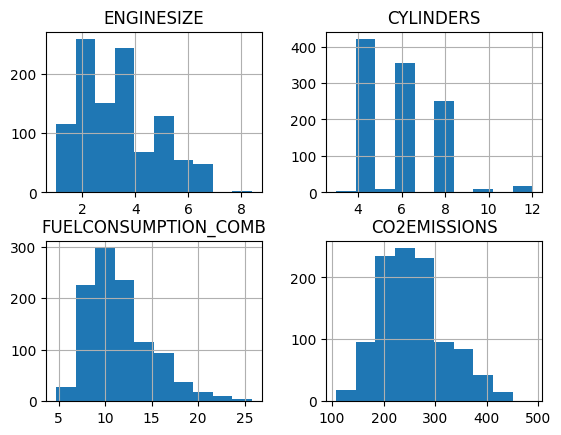

In [6]:
# plot each of these features
viz = cdf[features]
viz.hist()
plt.show()

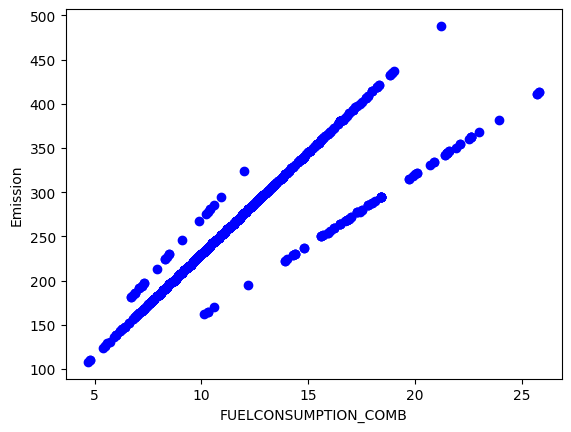

In [7]:
# plot each features against the emission
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='b')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show()

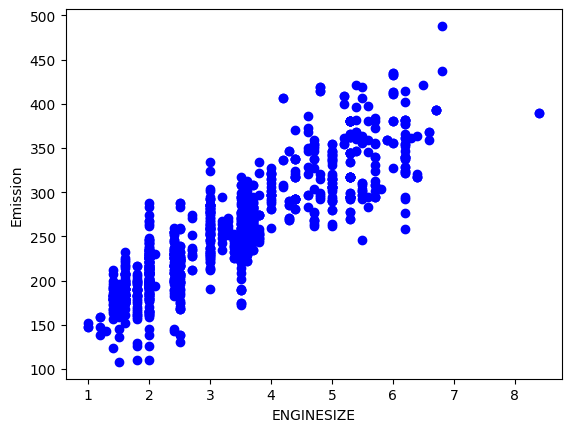

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='b')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emission')
plt.show()

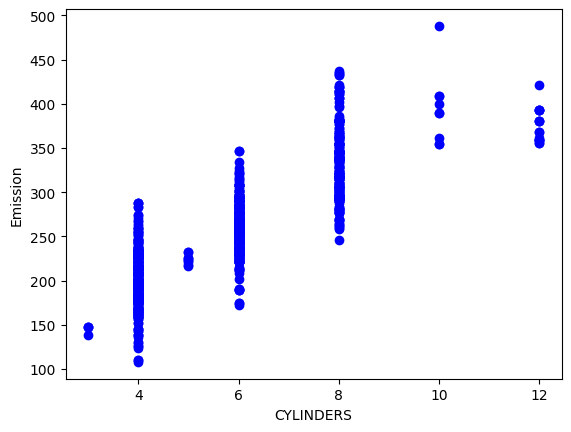

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='b')
plt.xlabel('CYLINDERS')
plt.ylabel('Emission')
plt.show()

**Creating train and test dataset**   
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. $80%$ of the entire dataset will be used for training and $20%$ for testing. We create a mask to select random rows using **np.random.rand()** function: 

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Simple Regression Model

Linear Regression fits a linear model with coefficients $B=(B_1, B_2, \ldots, B_n)$ to minimize the 'residual sum of squares' between the actual value y in the dataset and the predicted value yhat using linear approximation.

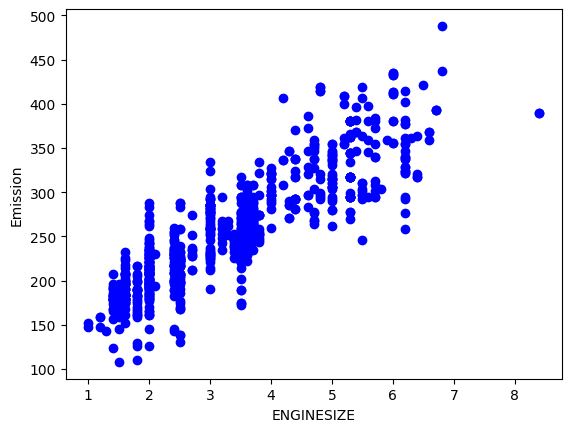

In [12]:
# let's see the train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='b')
plt.xlabel('ENGINESIZE')
plt.ylabel('Emission')
plt.show()

In [13]:
# modeling
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

lm.fit(train_x, train_y)

# the coefficients
print('Coefficient: ', lm.coef_)
print('Intercept: ', lm.intercept_)

Coefficient:  [[39.36978759]]
Intercept:  [125.36071562]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

Text(0, 0.5, 'Emission')

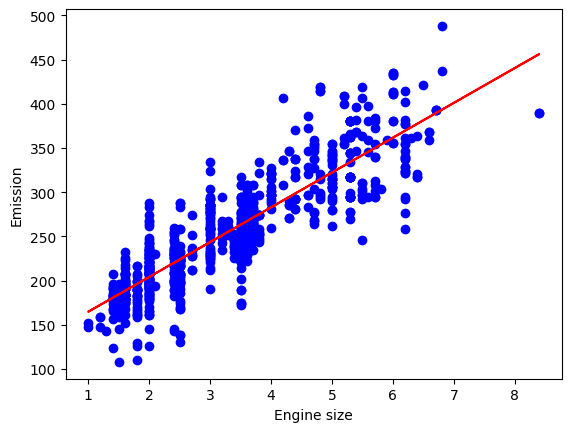

In [14]:
# plot the output
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='b')
plt.plot(train_x, lm.coef_[0][0]*train_x + lm.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

**Evaluation**   
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
- Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_yhat = lm.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_yhat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_yhat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_yhat) )

Mean absolute error: 22.17
Residual sum of squares (MSE): 838.03
R2-score: 0.78


In [16]:
# try FUELCONSUMPTION_COMB
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

lm.fit(train_x, train_y)

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_yhat = lm.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_yhat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_yhat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_yhat) )

Mean absolute error: 19.82
Residual sum of squares (MSE): 781.58
R2-score: 0.80


Text(0, 0.5, 'Emission')

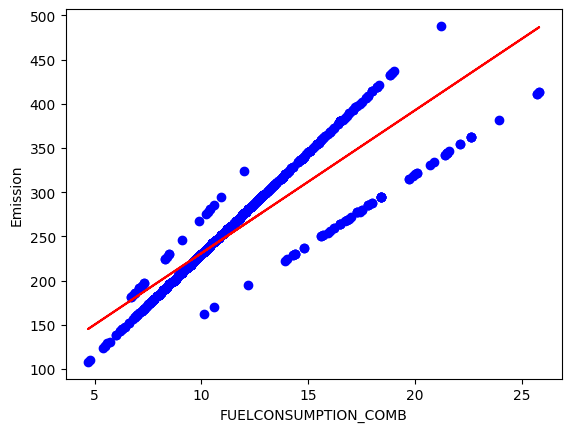

In [17]:
# plot the output
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='b')
plt.plot(train_x, lm.coef_[0][0]*train_x + lm.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

## Multiple Regression Model

In reality, there are multiple variables that impact the co2emission. When more than independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting `CO2EMISSION` using the features `FUELCONSUMPTION_COMB`, `ENGINESIZE` and `CYLINDERS` of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [18]:
# modeling
mlm = LinearRegression()

x_train = np.asanyarray(train[features[0:3]])
y_train = np.asanyarray(train[features[-1]])
mlm.fit(x_train, y_train)

print('Coefficients: ', mlm.coef_)
print('Intercept: ', mlm.intercept_)

Coefficients:  [10.04972898  7.99558619  9.70334123]
Intercept:  64.41933721179277


As mentioned before, **Coefficient** and **Intercept** are the parameters of the fitted line. Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.   

**Ordinary Least Squares (OLS)**   
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output (𝑦̂ ) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
- Solving the model parameters analytically using closed-form equations
- Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [19]:
# prediction
x_test = np.asanyarray(test[features[0:3]])
y_test = np.asanyarray(test[features[-1]])

y_hat = mlm.predict(test[features[0:3]])

print('MSE: %.2f' % np.mean((y_hat-y_test)**2))
print('Variance score: %.2f' % mlm.score(x_test, y_test))

MSE: 493.84
Variance score: 0.87


C:\Users\Master Com\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**Explained Variance regression score:**   
Let $\hat{y}$ be the estimated target output, $y$ the corresponding (correct) target output, and $Var$ be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$$explainedVariance(y,\hat{y})=1-\frac{Var(y-\hat{y})}{Var(y)}$$

The best possible score is 1.0, the lower values are worse.

In [21]:
# try using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY
# instead of FUELCONSUMPTION_COMB
features1 = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
           'FUELCONSUMPTION_HWY', 'CO2EMISSIONS']
mdf = df[features1]
train = mdf[msk]
test = mdf[~msk]

mlm1 = LinearRegression()
x_train1 = np.asanyarray(train[features1[0:4]])
y_train1 = np.asanyarray(train[features1[-1]])
mlm1.fit(x_train1, y_train1)
print('Coefficients: ', mlm1.coef_)

yhat = mlm1.predict(test[features1[0:4]])
x_test1 = np.asanyarray(test[features1[0:4]])
y_test1 = np.asanyarray(test[features[-1]])
print('Residual sum of squares: %.2f'%np.mean((yhat-y_test1)**2))
print('Variance score: %.2f'%mlm1.score(x_test1, y_test1))

Coefficients:  [10.13584214  7.76851172  5.84669091  3.68245942]
Residual sum of squares: 490.46
Variance score: 0.87


C:\Users\Master Com\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Polynomial Regression Model

When analyzing data, it's important to recognize that trends aren't always linear. They can exhibit curvature, leading to substantial errors when using linear regression. This is where Polynomial Regression comes into play. Polynomial regression involves modeling the relationship between the dependent variable y and the independent variable x as an nth-degree polynomial. The equation for an nth-degree polynomial is expressed as follows:
$$y = a + b_1x + b_2x^2 + \ldots + b_nx^n$$

Now, to fit our data on this equation, we need to create additional features to accomodate the polynomial terms such as quadratic term, cubic term, etc.

**PolynomialFeatures()** function in scikit-learn library can be use to drives a new feature sets from the original feature set.That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

x_train2 = np.asanyarray(train[['ENGINESIZE']])
y_train2 = np.asanyarray(train[['CO2EMISSIONS']])

x_test2 = np.asanyarray(test[['ENGINESIZE']])
y_test2 = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train2)
x_train_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** method takes the x values and output a list of that values raised from zeroth power to n-th power. Here, the limit is the second power since we set degree equal to 2.

Now, with this new features we can fit it into a LinearRegression object.

In [26]:
plm = LinearRegression()
plm.fit(x_train_poly, y_train2)

print('Coefficients: ', plm.coef_)
print('Intercept: ', plm.intercept_)

Coefficients:  [[ 0.         51.0616876  -1.55582502]]
Intercept:  [106.74600542]


Text(0, 0.5, 'Emission')

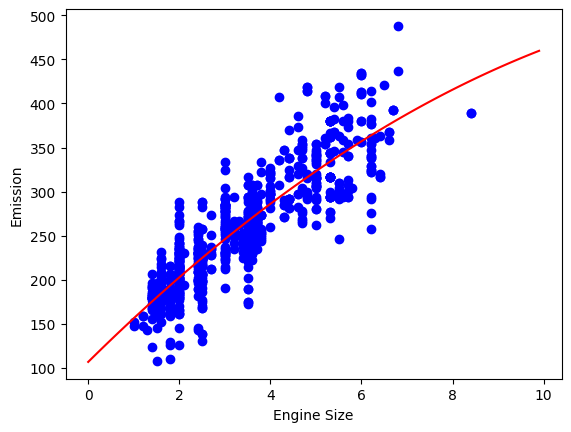

In [28]:
# Plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='b')

xcurve = np.arange(0.0, 10.0, 0.1)
ycurve = plm.intercept_[0] + plm.coef_[0][1]*xcurve + plm.coef_[0][2]*np.power(xcurve, 2)

plt.plot(xcurve, ycurve, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [39]:
# Evaluation
x_test_poly = poly.fit_transform(x_test2)
yhat_test = plm.predict(x_test_poly)

MAE = np.mean(np.absolute(yhat_test-y_test2))
MSE = np.mean((yhat_test-y_test2)**2)
R2 = r2_score(y_test2, yhat_test)

print(f'Mean Absolute Error: {MAE:.4f}')
print(f'Mean Sum of Square Error: {MSE:.4f}')
print(f'R2-score: {R2:.4f}')

Mean Absolute Error: 22.2172
Mean Sum of Square Error: 834.0855
R2-score: 0.7828


In [40]:
# try use third degree polynomial
poly1 = PolynomialFeatures(degree=3)

x_train_poly1 = poly1.fit_transform(x_train2)
plm1 = LinearRegression()
plm1.fit(x_train_poly1, y_train2)

x_test_poly1 = poly1.fit_transform(x_test2)
yhat_test1 = plm1.predict(x_test_poly1)

MAE = np.mean(np.absolute(yhat_test1-y_test2))
MSE = np.mean((yhat_test1-y_test2)**2)
R2 = r2_score(y_test2, yhat_test1)

print(f'Mean Absolute Error: {MAE:.4f}')
print(f'Mean Sum of Square Error: {MSE:.4f}')
print(f'R2-score: {R2:.4f}')

Mean Absolute Error: 22.3511
Mean Sum of Square Error: 838.7183
R2-score: 0.7816


Text(0.5, 1.0, 'Third-degree Polynomial Regression')

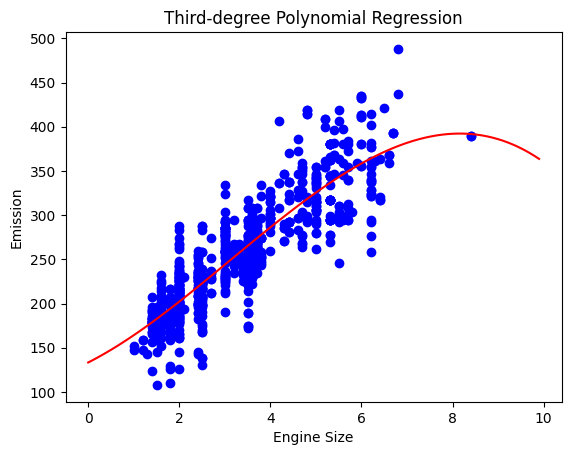

In [41]:
# Plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='b')

xcurve = np.arange(0.0, 10.0, 0.1)
ycurve = plm1.intercept_[0] + plm1.coef_[0][1]*xcurve + plm1.coef_[0][2]*np.power(xcurve, 2) + plm1.coef_[0][3]*np.power(xcurve, 3)

plt.plot(xcurve, ycurve, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.title('Third-degree Polynomial Regression')

## Non-Linear Regression Analysis

If the data shows a curvy trend, then linear regression will not produce accurate results when compared to a non-linear regression since linear regression presumes that the data is linear. Let's learn about non linear regressions and apply an example in python. Here, we fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014. 

Although linear regression can do a great job at modeling some datasets, it cannot be used for all datasets. First recall how linear regression, models a dataset. It models the linear relationship between a dependent variable `y` and the independent variables `x`. It has a simple equation, of degree 1:
$$y = a + b_1𝑥$$

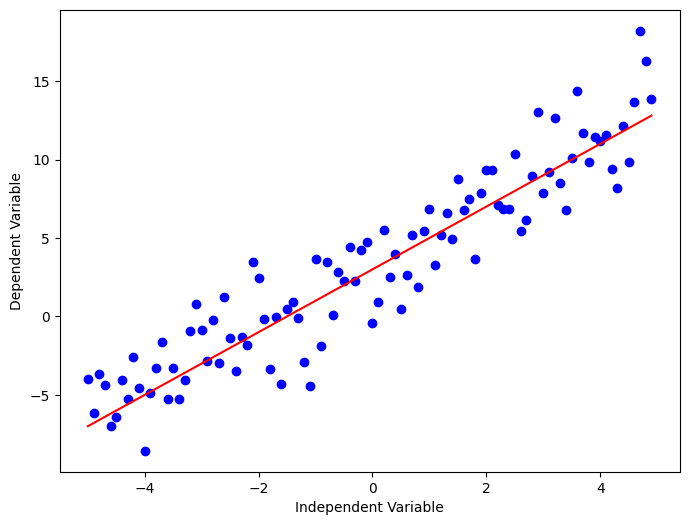

In [42]:
# graph example of linear regression
x = np.arange(-5.0, 5.0, 0.1)

# we can adjust the slope and intercept
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Non-linear regression is a method to model the non-linear relationship between the independent variables `𝑥`
and the dependent variable `𝑦`. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of n-degrees (maximum power of `𝑥`). For example:
$$y = a + b_1x + b_2x^2 + \ldots + b_nx^n$$ 

Non-linear functions can have elements like exponentials, logarithms, fractions, and so on. For example:
$$y = \log{(x)}$$

We can have a function that's even more complicated such as :
$$y = \log{(a + b_1x + b_2x^2 + \ldots + b_nx^n)}$$

Let's take a look at a cubic function's graph.

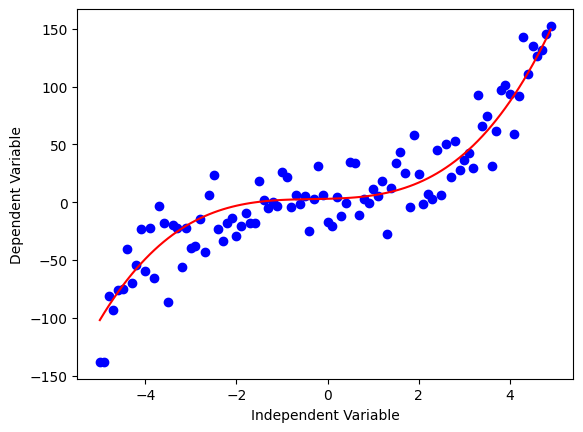

In [43]:
x = np.arange(-5.0, 5.0, 0.1)

# We can adjust the slope and intercept
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

As we can see, this function has $x^3$ and $x^2$ terms as independent variables. Also, the graphic shows a curve line. Hence, this is a non-linear function.

Some other types of non-linear functions are:

**Quadratic Function**   
$$y = x^2$$

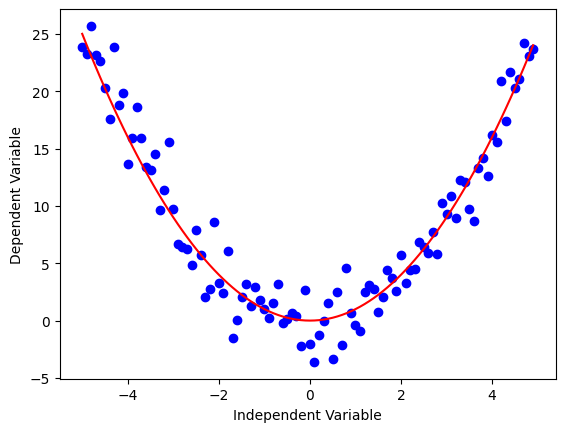

In [44]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Exponential Function**   
An exponential function with base c is define by
$$y = a + bc^x$$   
where $b\ne0, c>0, c\ne1$, and $x\in R$. The base c is constant and the exponent x is the independent variable.

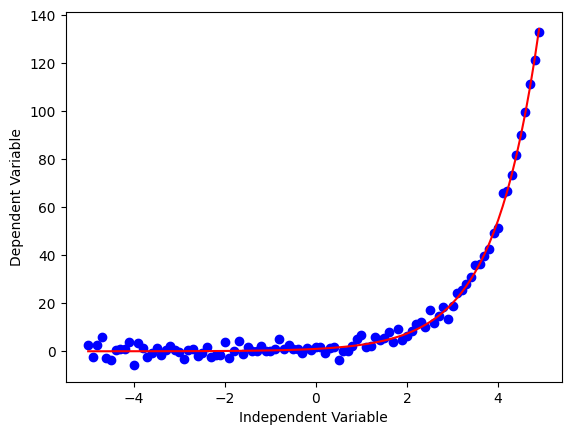

In [46]:
X = np.arange(-5.0, 5.0, 0.1)
Y= np.exp(X)
Ydata = Y + 2*np.random.normal(size=X.size)

plt.plot(X,Ydata, 'bo')
plt.plot(X,Y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Logarithmic Function**   
$$y = \log{(X)}$$

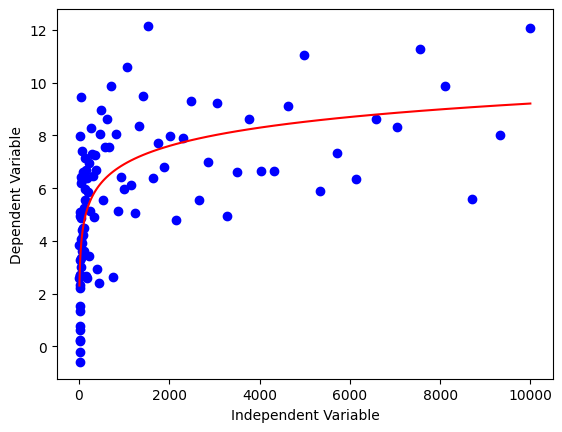

In [58]:
X = np.logspace(1, 4, 100)
Y= np.log(X)
Ydata = Y + 2*np.random.normal(size=X.size)

plt.plot(X,Ydata, 'bo')
plt.plot(X,Y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

**Sigmoid/Logistic Function**  
$$y = a + \frac{b}{1 + c^{(X-d)}}$$

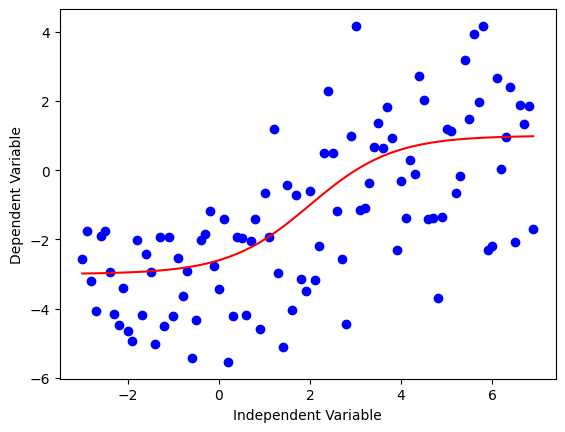

In [60]:
X = np.arange(-3, 7, 0.1)
Y= 1-4/(1+np.power(3, X-2))
Ydata = Y + 2*np.random.normal(size=X.size)

plt.plot(X,Ydata, 'bo')
plt.plot(X,Y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Non-Linear Regression Example

For an example, we're going to try and fit a non-linear model to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.

In [64]:
# downloading dataset
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv -o china_gdp.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1218  100  1218    0     0    738      0  0:00:01  0:00:01 --:--:--   739


In [65]:
# read the data
data = pd.read_csv('china_gdp.csv')
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


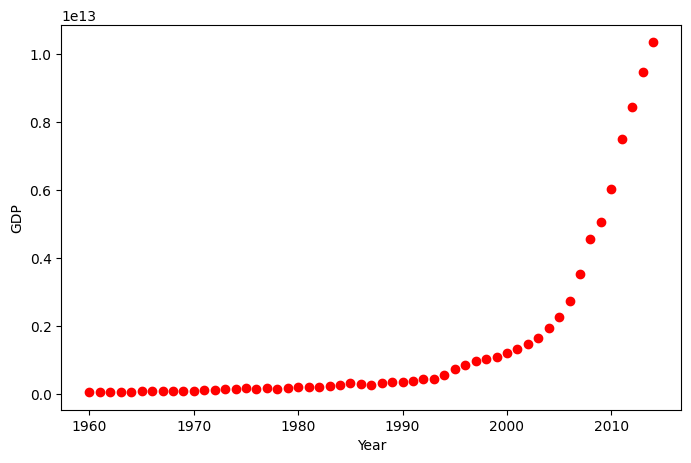

In [66]:
# plot the dataset
plt.figure(figsize=(8,5))
x_data, y_data = data['Year'].values, data['Value'].values
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates slightly in the 2010s.

**Choosing a model**  
From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

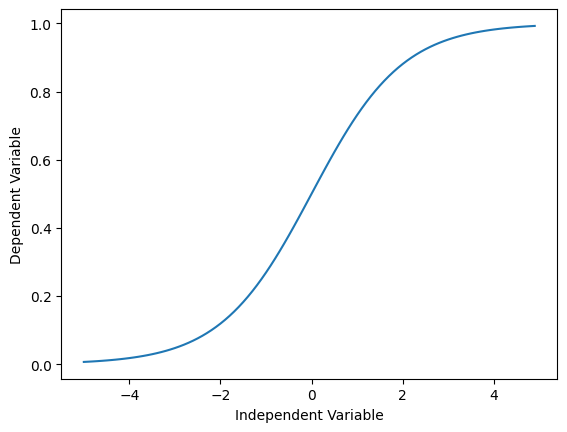

In [67]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is as follows:
$$y = \frac{1}{1 + e^{-\beta_1(X-\beta_2)}}$$
- $\beta_1$: Controls the curve's steepness,
- $\beta_2$: Slides the curve on the x-axis.

**Building the model**   
Now, let's build our regression model and initialize its parameters.

In [68]:
def sigmoid(x, beta_1, beta_2):
    return 1 / (1 + np.exp(-beta_1*(x-beta_2)))    

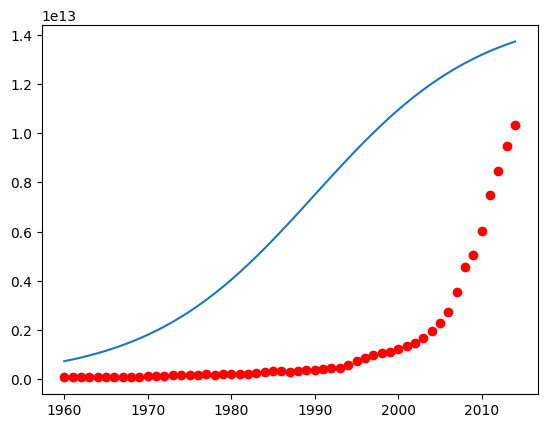

In [69]:
# let's try arbitrary values for the parameters first
beta_1 = 0.10
beta_2 = 1990.0

# logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

# plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [70]:
# we need to find the best parameters
# first, let's normalize the data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

**How to find the best parameters for our fit line?**   
We can use **curve_fit** from scipy library.

In [71]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(f'beta_1: {popt[0]:.4f}, beta_2: {popt[1]:.4f}')

beta_1: 690.4517, beta_2: 0.9972


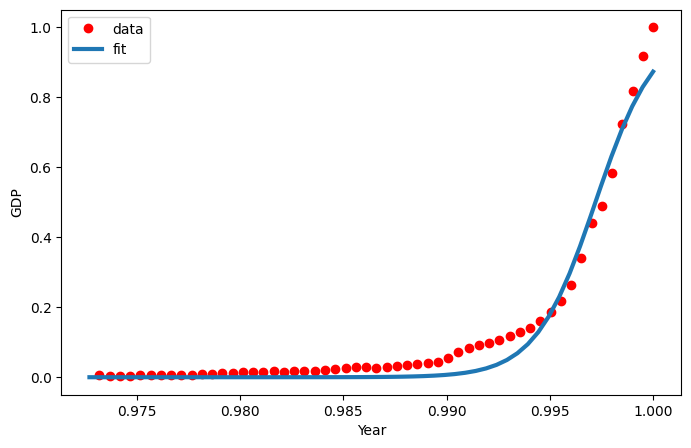

In [72]:
# now, plot the result
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [73]:
# calculate the accuray of our model
# split data into train/test
msk = np.random.rand(len(data)) < 0.8
train_x = xdata[msk]
train_y = ydata[msk]

test_x = xdata[~msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
MAE = np.mean(np.absolute(y_hat-test_y))
MSE = np.mean((y_hat-test_y)**2)
R2 = r2_score(test_y, y_hat)

print(f'Mean Absolute Error: {MAE:.4f}')
print(f'Mean Sum of Square Error: {MSE:.4f}')
print(f'R2-score: {R2:.4f}')

Mean Absolute Error: 0.0312
Mean Sum of Square Error: 0.0012
R2-score: 0.9763
